In [1]:
#Instalacion de dependencias
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install openpyxl
!pip install scikit-learn
!pip install numpy

In [13]:
# Importar librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Primeras filas del dataset:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5


Estadísticas descriptivas:


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,7906,7906.000000,7.906000e+03,7.906000e+03,7906,7906,7906,7906,7906,7906,7906,7906,7906.000000
unique,1982,NaN,NaN,NaN,4,3,2,5,393,121,320,441,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,129,NaN,NaN,NaN,4299,6563,6865,5215,225,1017,377,530,NaN
mean,NaN,2013.983936,6.498137e+05,6.918866e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.416393
std,NaN,3.863695,8.135827e+05,5.679230e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.959208
min,NaN,1994.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2012.000000,2.700000e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.900000e+05,9.542500e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


Valores faltantes:
 name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
seats            0
dtype: int64


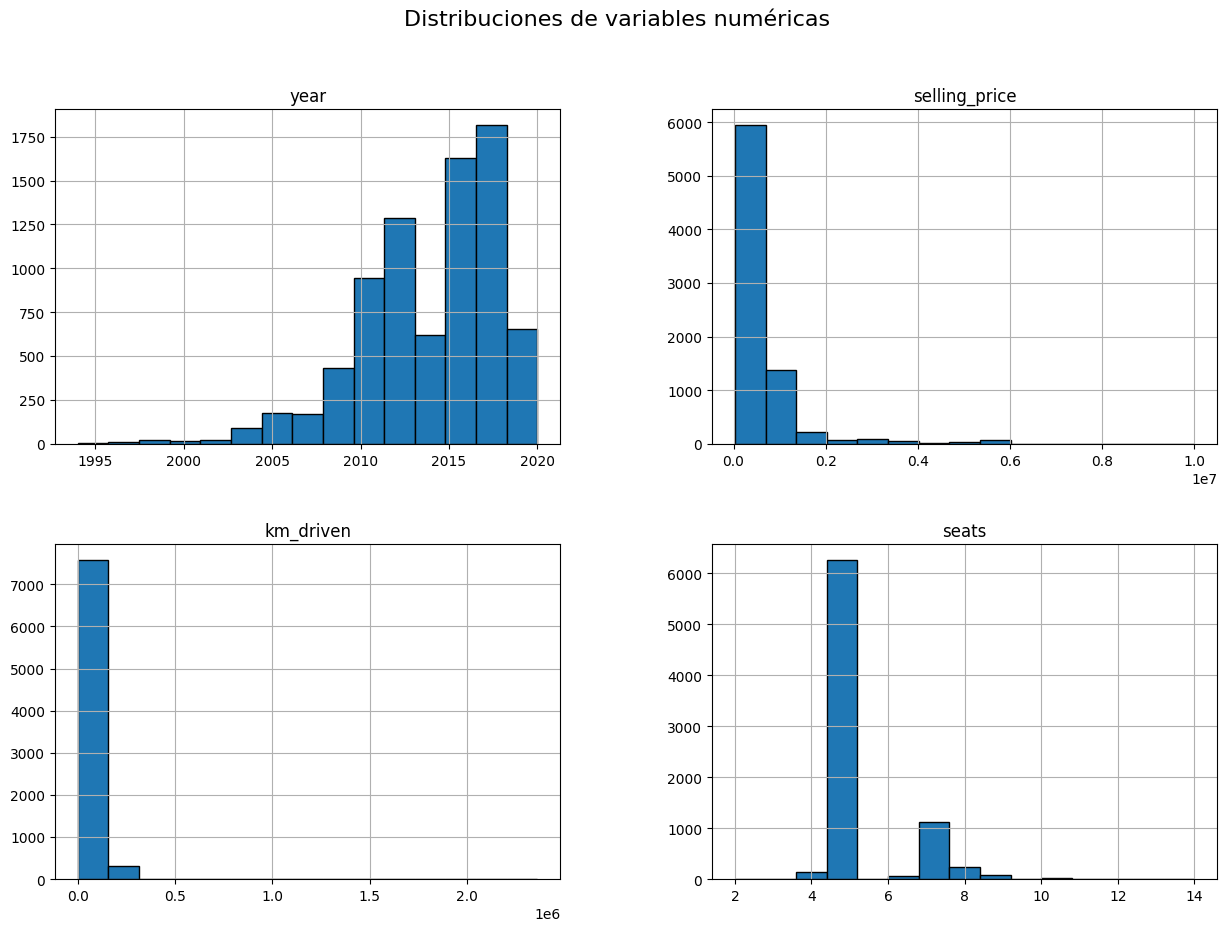

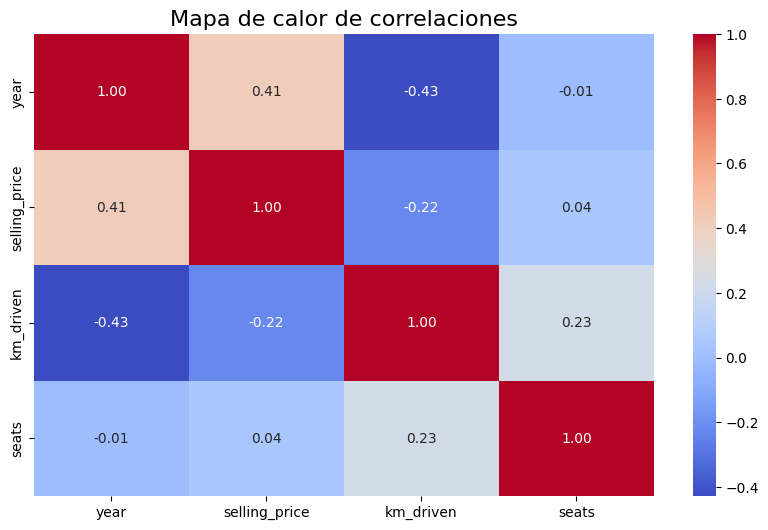

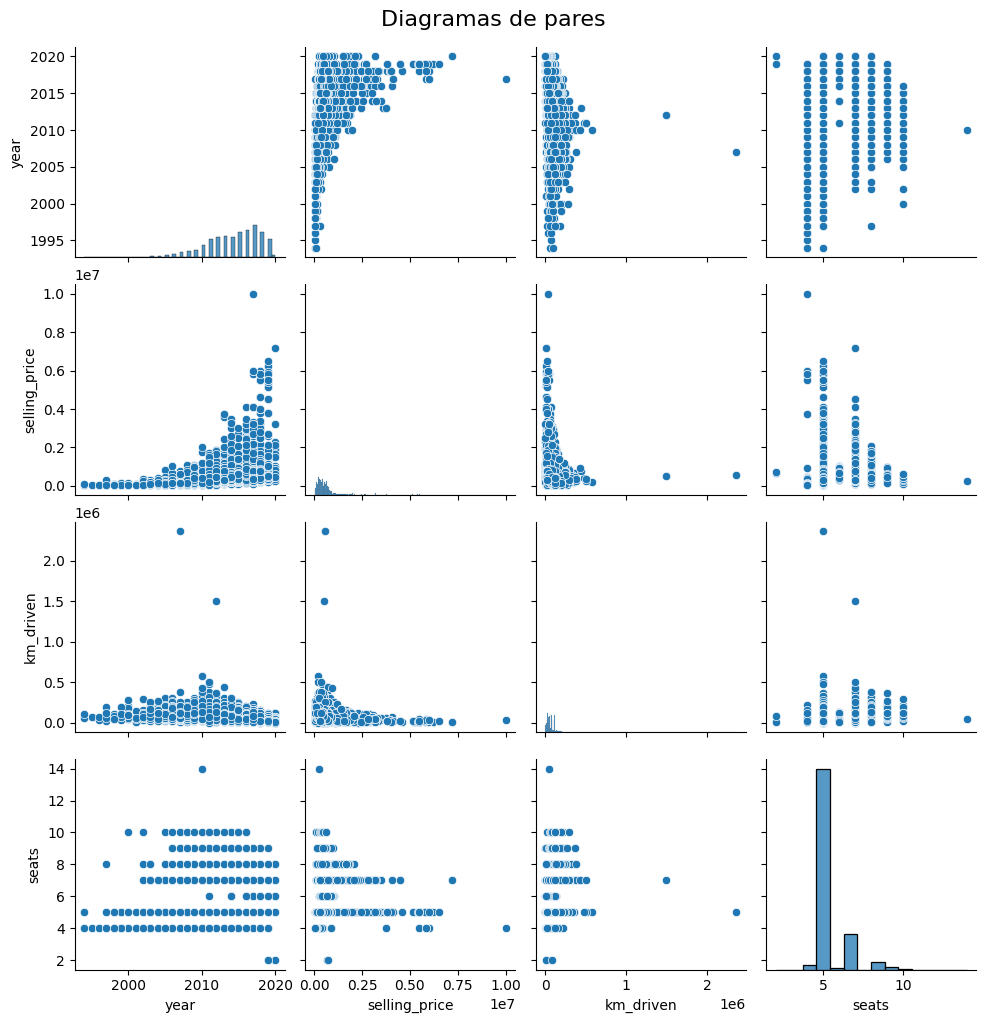

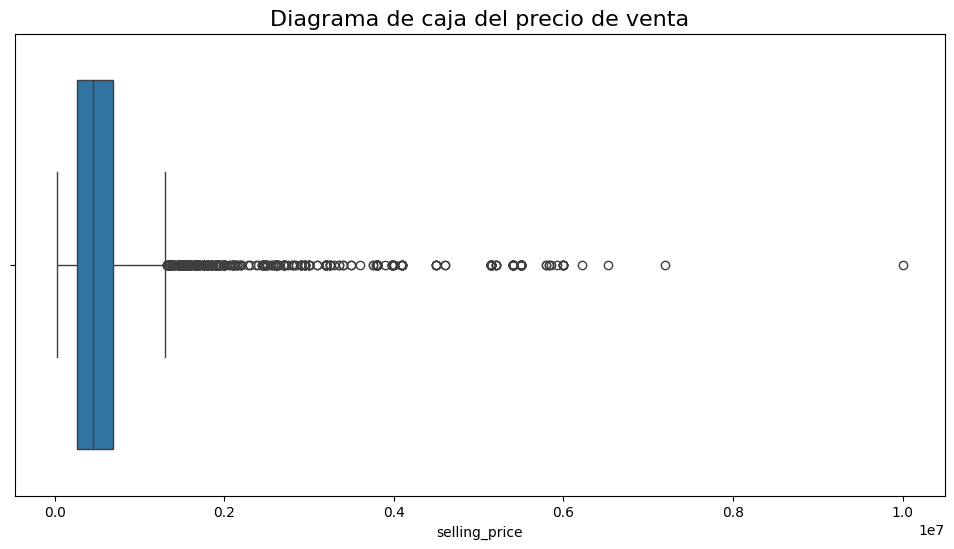

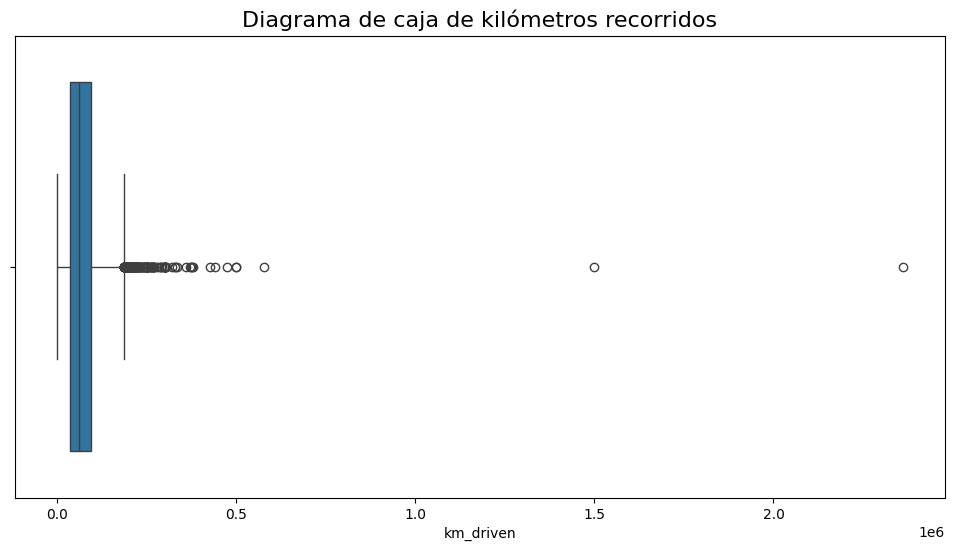

In [14]:
#1. Análisis Exploratorio de los Datos

# Cargar los datos
data = pd.read_csv('Dataset_1.csv', delimiter=';')

# Mostrar las primeras filas
print("Primeras filas del dataset:")
display(data.head())

# Estadísticas descriptivas
print("Estadísticas descriptivas:")
display(data.describe(include='all'))

# Revisar valores faltantes
missing_values = data.isnull().sum()
print("Valores faltantes:\n", missing_values)

# Visualizar distribuciones
numeric_columns = ['year', 'selling_price', 'km_driven', 'seats']
data[numeric_columns].hist(bins=15, figsize=(15, 10), edgecolor='black')
plt.suptitle('Distribuciones de variables numéricas', fontsize=16)
plt.show()

# Matriz de correlación
correlation_matrix = data[['year', 'selling_price', 'km_driven', 'seats']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de calor de correlaciones', fontsize=16)
plt.show()

# Diagrama de pares (Pairplot)
sns.pairplot(data[['year', 'selling_price', 'km_driven', 'seats']])
plt.suptitle('Diagramas de pares', y=1.02, fontsize=16)
plt.show()

# Boxplot para identificar valores atípicos
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='selling_price')
plt.title('Diagrama de caja del precio de venta', fontsize=16)
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x='km_driven')
plt.title('Diagrama de caja de kilómetros recorridos', fontsize=16)
plt.show()

In [15]:
#2. Preprocesamiento de los Datos
# Convertir las columnas a tipo cadena para manejar el problema
data['mileage'] = data['mileage'].astype(str).str.extract(r'([\d.]+)').astype(float)
data['engine'] = data['engine'].astype(str).str.extract(r'([\d.]+)').astype(float)
data['max_power'] = data['max_power'].astype(str).str.extract(r'([\d.]+)').astype(float)
data['torque'] = data['torque'].astype(str).str.extract(r'([\d.]+)').astype(float)

# Proceder con la codificación y normalización como antes
# Codificar variables categóricas con One-Hot Encoding
categorical_columns = ['fuel', 'seller_type', 'transmission', 'owner']
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Normalizar columnas numéricas
scaler = MinMaxScaler()
columns_to_normalize = ['km_driven', 'mileage', 'engine', 'max_power']
data_encoded[columns_to_normalize] = scaler.fit_transform(data_encoded[columns_to_normalize])

# Detectar y eliminar valores atípicos
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Primer cuartil
    Q3 = df[column].quantile(0.75)  # Tercer cuartil
    IQR = Q3 - Q1  # Rango intercuartílico
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior
    return lower_bound, upper_bound

sp_lower, sp_upper = detect_outliers(data_encoded, 'selling_price')
km_lower, km_upper = detect_outliers(data_encoded, 'km_driven')

# Filtrar valores atípicos
data_filtered = data_encoded[
    (data_encoded['selling_price'] >= sp_lower) & (data_encoded['selling_price'] <= sp_upper) &
    (data_encoded['km_driven'] >= km_lower) & (data_encoded['km_driven'] <= km_upper)
]

# Comparar tamaño antes y después del filtrado
original_size = data_encoded.shape[0]
filtered_size = data_filtered.shape[0]

print(f"Tamaño original del dataset: {original_size}")
print(f"Tamaño después de eliminar valores atípicos: {filtered_size}")

# Guardar el dataset preprocesado
data_filtered.to_csv('dataset_preprocessed.csv', index=False)
print("El dataset preprocesado se ha guardado como 'dataset_preprocessed.csv'.")


Tamaño original del dataset: 7906
Tamaño después de eliminar valores atípicos: 7114
El dataset preprocesado se ha guardado como 'dataset_preprocessed.csv'.


In [18]:
# 3. Selección de Características

from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Cargar el dataset preprocesado
data_filtered = pd.read_csv('dataset_preprocessed.csv')

# Separar las variables predictoras (X) y la variable objetivo (y)
X = data_filtered.drop(columns=['selling_price', 'name'])  # Excluir 'name' y 'selling_price'
y = data_filtered['selling_price']

# Verificar las columnas disponibles
print("Columnas disponibles en X:")
print(X.columns)

# Entrenar un modelo Random Forest para evaluar la importancia de las características
rf = RandomForestRegressor(random_state=42)
rf.fit(X, y)

# Selección Recursiva de Características (RFE)
lr = LinearRegression()
num_features = min(10, X.shape[1])  # Seleccionar las 10 características más relevantes o menos si hay menos de 10
rfe = RFE(estimator=lr, n_features_to_select=num_features)
rfe.fit(X, y)

# Mostrar las características seleccionadas
selected_features = X.columns[rfe.support_]
print("Características seleccionadas con RFE:")
print(selected_features)

# Crear un nuevo DataFrame con las características seleccionadas
data_selected = data_filtered.loc[:, selected_features].copy()  # Copia explícita para evitar SettingWithCopyWarning
data_selected['selling_price'] = y  # Agregar la variable objetivo al DataFrame

# Guardar el dataset con las características seleccionadas
data_selected.to_csv('dataset_selected_features.csv', index=False)
print("Dataset con características seleccionadas guardado como 'dataset_selected_features.csv'.")

Columnas disponibles en X:
Index(['year', 'km_driven', 'mileage', 'engine', 'max_power', 'torque',
       'seats', 'fuel_Diesel', 'fuel_LPG', 'fuel_Petrol',
       'seller_type_Individual', 'seller_type_Trustmark Dealer',
       'transmission_Manual', 'owner_Fourth & Above Owner',
       'owner_Second Owner', 'owner_Test Drive Car', 'owner_Third Owner'],
      dtype='object')
Características seleccionadas con RFE:
Index(['km_driven', 'engine', 'max_power', 'fuel_Diesel', 'fuel_LPG',
       'seller_type_Trustmark Dealer', 'transmission_Manual',
       'owner_Fourth & Above Owner', 'owner_Second Owner',
       'owner_Third Owner'],
      dtype='object')
Dataset con características seleccionadas guardado como 'dataset_selected_features.csv'.


In [19]:
#4. División en Train y Test

from sklearn.model_selection import train_test_split

# Cargar el dataset con características seleccionadas
data_selected = pd.read_csv('dataset_selected_features.csv')

# Separar las variables predictoras (X) y la variable objetivo (y)
X = data_selected.drop(columns=['selling_price'])  # Variables predictoras
y = data_selected['selling_price']  # Variable objetivo

# Dividir el dataset en Train (80%) y Test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar las dimensiones de los conjuntos
print(f"Tamaño del conjunto de entrenamiento: {X_train.shape[0]} muestras")
print(f"Tamaño del conjunto de prueba: {X_test.shape[0]} muestras")

Tamaño del conjunto de entrenamiento: 5691 muestras
Tamaño del conjunto de prueba: 1423 muestras


In [21]:
#5. Entrenamiento del Modelo

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error

# 1. Configurar el modelo de Regresión Lineal
model = LinearRegression()

# 2. Entrenar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# 3. Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# 4. Evaluar el modelo en el conjunto de prueba
mse = mean_squared_error(y_test, y_pred)  # Mean Squared Error
rmse = root_mean_squared_error(y_test, y_pred)  # Root Mean Squared Error
mae = mean_absolute_error(y_test, y_pred)  # Mean Absolute Error
r2 = r2_score(y_test, y_pred)  # Coeficiente de determinación (R²)

# 5. Mostrar las métricas de desempeño
print("Evaluación del Modelo de Regresión Lineal:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R² Score: {r2:.2f}")

Evaluación del Modelo de Regresión Lineal:
Mean Squared Error (MSE): 26509943341.91
Root Mean Squared Error (RMSE): 162818.74
Mean Absolute Error (MAE): 126739.16
R² Score: 0.58


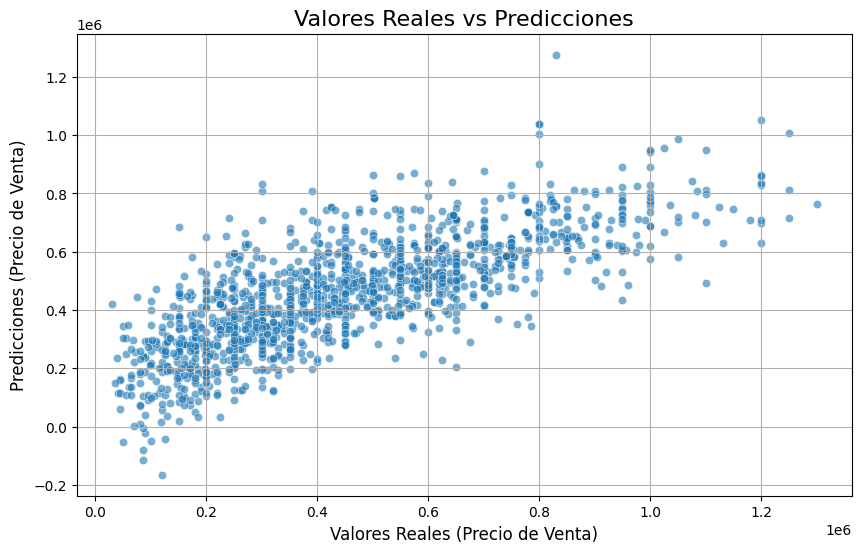

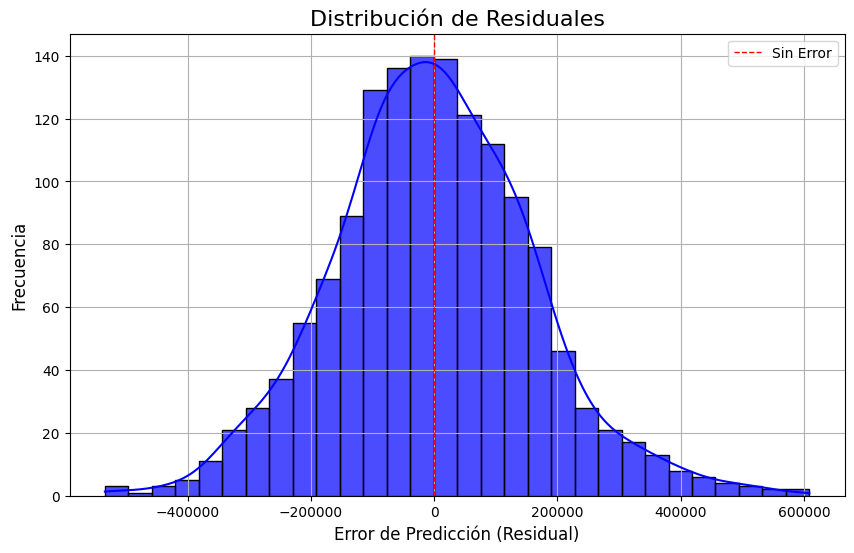

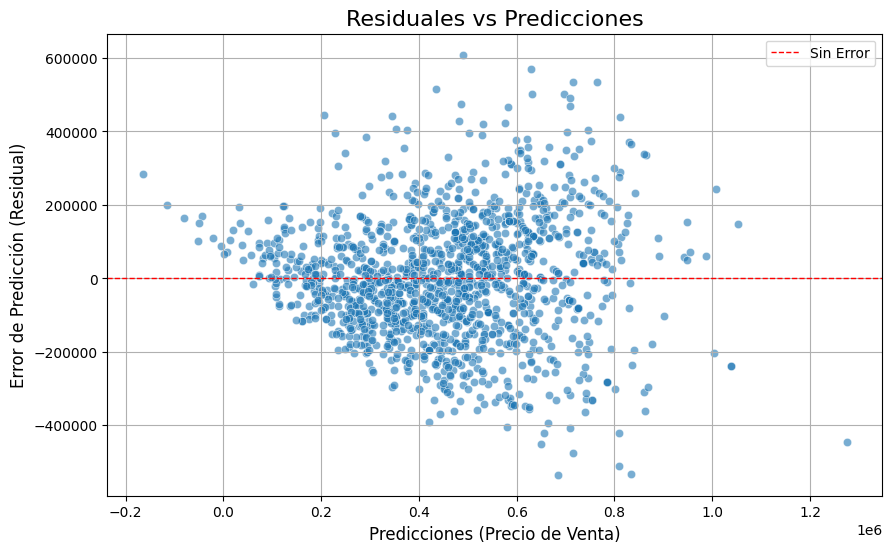

In [22]:
# 6. Evaluación del Desempeño del Modelo con Visualizaciones

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Gráfico de dispersión: Valores reales vs Predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.title('Valores Reales vs Predicciones', fontsize=16)
plt.xlabel('Valores Reales (Precio de Venta)', fontsize=12)
plt.ylabel('Predicciones (Precio de Venta)', fontsize=12)
plt.grid(True)
plt.show()

# 2. Gráfico de residuales: Errores de Predicción
residuals = y_test - y_pred  # Cálculo de los residuales
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30, color='blue', alpha=0.7)
plt.title('Distribución de Residuales', fontsize=16)
plt.xlabel('Error de Predicción (Residual)', fontsize=12)
plt.ylabel('Frecuencia', fontsize=12)
plt.axvline(x=0, color='red', linestyle='--', linewidth=1, label='Sin Error')
plt.legend()
plt.grid(True)
plt.show()

# 3. Gráfico de residuales vs Predicciones
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.6, edgecolors='w', linewidth=0.5)
plt.axhline(y=0, color='red', linestyle='--', linewidth=1, label='Sin Error')
plt.title('Residuales vs Predicciones', fontsize=16)
plt.xlabel('Predicciones (Precio de Venta)', fontsize=12)
plt.ylabel('Error de Predicción (Residual)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


In [24]:
#7 Resultados
resultados = f"""
El modelo de Regresión Lineal explica el {r2:.2%} de la variación en el precio de venta (R²).
El error cuadrático medio (MSE) es de {mse:.2f}, lo que indica la magnitud promedio del error cuadrático.
El error promedio absoluto (MAE) es de {mae:.2f}, lo que muestra el error promedio absoluto.
"""
print(resultados)



El modelo de Regresión Lineal explica el 57.82% de la variación en el precio de venta (R²).
El error cuadrático medio (MSE) es de 26509943341.91, lo que indica la magnitud promedio del error cuadrático.
El error promedio absoluto (MAE) es de 126739.16, lo que muestra el error promedio absoluto.

